# Program JCDSOL-016 - Capstone Project Modul 3
- **Nama Peserta : Edward Fajar Binsar Halomoan Hutapea**
- **Dataset yang dipilih : data_daegu_apartment**

## Contents:
1.	Business Problem Understanding (Context, Problem Statement, Goals, Analytic Approach, Evaluation Metrics)
2.	Features pada Dataset (data Daegu Apartment)
3.	Data Wrangling - Pengecekan Anomali Data (Missing Value, Data Duplikat, Outliers)
4.	Data Conversion
5.	Analisa Korelasi
6.	Analisa Intercept dan Koefisien
7.	Scalling pada features
8.	Analisa Error
9.	Cross Validation
10.	Prediksi Test Dataset menggunakan Benchmark Model
11.	Improvement Melalui Data
12.	Improvement Melalui Model
13.	Conclusion dan Reccomendation

### **Business Problem Understanding**

**Context**

Apartemen adalah salah satu solusi bagi kebutuhan akan rumah karena terbatasnya lahan dan tingginya aktivitas warga di daerah perkotaan. Apartemen yang cocok di kantong warga dan dilengkapi dengan fasilitas sesuai kebutuhan warga menjadi target dari para calon penyewa apartemen. Oleh sebab itu, penentuan harga apartemen menjadi faktor vital, dimana harga apartemen sangat dipengaruhi oleh beragam faktor internal dan eksternal.

**Problem Statement**

Para owner biasanya menawarkan apartemen sesuai dengan perhitungan subjektif mereka sendiri. Akibatnya fenomena overprice dan underprice kerap terjadi pada saat transaksi apartemen, karena owner tidak selalu akurat memprediksi harga pasar. Kalau harga lebih tinggi dari harga pasar (overprice) maka owner akan kesulitan mendapatkan pembeli/penyewa. Begitu juga sebaliknya, kalau harga lebih rendah dari harga pasar (underprice) maka owner akan kesulitan mendapatkan keuntungan yang maksimal.

Fakta di atas berlaku juga pada penentuan harga apartemen di Korea Selatan. Dengan terus meningkatknya jumlah kebutuhan apartement dari tahun ke tahun, maka penentukan harga yang tepat dan tetap kompetitif menjadi krusial. **Capstone Project ini akan menganalisa fenomena ini dan memberikan solusi dalam penentuan harga apartemen di Korea Selatan seakurat mungkin, untuk meminimalisir peluang terjadinya overprice dan underprice**

**Goals**

1. Berdasarkan permasalahan di atas, kita perlu membantu owner apartment untuk dapat **menentukan harga apartment yang tepat untuk masing-masing apartement**.

2. Adanya perbedaan pada berbagai features (seperti tipe apartemen, Waktu tempuh ke stasiun subway terdekat, Nama stasiun subway terdekat , Jumlah fasilitas di sekitar apartemen, Jumlah perkantoran umum di sekitar apartemen, Jumlah universitas di sekitar apartemen, Jumlah parking lot di apartemen, Tahun apartemen dibangun, Jumlah fasilitas di apartemen, Luas unit apartemen dan Harga unit apartemen) diharapkan **dapat menambah keakuratan prediksi harga apartemen**.

3. Dengan data yang akurat, harapannya prediksi harga bisa memenuhi 2 hal secara bersamaan yaitu:
    - bisa mendatangkan profit bagi owner. Kerugian owner akibat underprice dapat diminimalisir, dan 
    - masih terjangkau bagi penyewa. Kerugian penyewa akibat overprice dapat diminimalisir.

**Analytic Approach**

1. Kita akan analisa data untuk menemukan pola dari features yang tersedia sebagai pembeda antara 1 apartemen dengan apartemen lainnya. 

2. Kemudian kita akan buat suatu model regresi yang membantu owner menyediakan 'tool' prediksi harga apartemen. Harapannya kerugian owner akibat overprice dan underprice dapat diminimalisir.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah R squared, MAE, MSE dan RMSE, yaitu:

1. R squared Nilai
    - R-squared digunakan untuk mengetahui seberapa bagus model dapat merepresentasikan varians keseluruhan data. 
    - Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi.

2. Error ==> MAE, MSE dan RMSE
    - MAE adalah rata-rata nilai absolut dari error
    - MSE adalah rata-rata Error yang sudah di-kuadrat-kan
    - RMSE adalah rata-rata akar kuadrat dari error
    - Semakin kecil nilai MAE, MSE dan RMSE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga apartemen sesuai dengan limitasi fitur yang digunakan.

## 1. Import Package

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [112]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **Data Understanding**

- Dataset merupakan data Daegu Apartment
- Setiap baris data merepresentasikan informasi terkait unit apartemen, lingkungan sekitarnya dan subway station terdekat.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe unit apartemen |
| TimeToSubway | Object | Waktu tempuh ke stasiun subway terdekat |
| SubwayStation | Object | Nama stasiun subway terdekat |
| N_FacilitiesNearBy(ETC) | Float| Jumlah fasilitas di sekitar apartemen |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah perkantoran umum di sekitar apartemen |
| N_SchoolNearBy(University) | Float | Jumlah universitas di sekitar apartemen |
| N_Parkinglot(Basement) | Float | Jumlah parking lot di apartemen |
| YearBuilt | Integer | Tahun apartemen dibangun |
| N_FacilitiesInApt | Integer | Jumlah fasilitas di apartemen |
| Size(sqf) | Integer | Luas unit apartemen (dalam square feet) |
| SalePrice | Integer | Harga unit apartemen (dalam Won) |

<br>

## 3. Data Wrangling

### 3.1. Pengecekan Tipe Data

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### 3.2. Deskriptif Data Statistik untuk data numerik dan object

In [114]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HallwayType,4123,3,terraced,2528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeToSubway,4123,5,0-5min,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubwayStation,4123,8,Kyungbuk_uni_hospital,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N_FacilitiesNearBy(ETC),4123.0,NaN,NaN,NaN,1.930876,2.198832,0.0,0.0,1.0,5.0,5.0
N_FacilitiesNearBy(PublicOffice),4123.0,NaN,NaN,NaN,4.135338,1.80264,0.0,3.0,5.0,5.0,7.0
N_SchoolNearBy(University),4123.0,NaN,NaN,NaN,2.746301,1.49661,0.0,2.0,2.0,4.0,5.0
N_Parkinglot(Basement),4123.0,NaN,NaN,NaN,568.979141,410.372742,0.0,184.0,536.0,798.0,1321.0
YearBuilt,4123.0,NaN,NaN,NaN,2002.999757,8.905768,1978.0,1993.0,2006.0,2008.0,2015.0
N_FacilitiesInApt,4123.0,NaN,NaN,NaN,5.817851,2.340507,1.0,4.0,5.0,7.0,10.0
Size(sqf),4123.0,NaN,NaN,NaN,954.630851,383.805648,135.0,644.0,910.0,1149.0,2337.0


### 3.3. Pengecekan Anomali Data

#### 3.3.1. Pengecekan Missing Value

In [115]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(df[i].isna().sum() / len(df) * 100, 2)
    ])

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage"
])

,Data Features,Data Types,Null Val,Null Percentage
0,HallwayType,object,0,0.0
1,TimeToSubway,object,0,0.0
2,SubwayStation,object,0,0.0
3,N_FacilitiesNearBy(ETC),float64,0,0.0
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0
5,N_SchoolNearBy(University),float64,0,0.0
6,N_Parkinglot(Basement),float64,0,0.0
7,YearBuilt,int64,0,0.0
8,N_FacilitiesInApt,int64,0,0.0
9,Size(sqf),int64,0,0.0


**Hasil Pengecekan Missing Value : Tidak ada data yang hilang/kosong**

#### 3.3.2. Pengecekan Data Duplikat

In [116]:
print(df.duplicated().sum())

1422


In [117]:
df[df.duplicated()].head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141


**Hasil Pengecekan Data Duplikat :**
- Tabel di atas menunjukkan data yang duplikat. Berdasarkan tabel tersebut, terdapat 1422 baris yang memiliki data duplikat.
- Step selanjutnya ==> Menghapus semua data duplikat.

In [118]:
## Menghapus semua data duplikat
df.drop_duplicates(inplace=True)

## Mengecek apakah masih ada data duplikat yang belum dihapus
duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat saat ini yaitu {duplikat} baris.")

Jumlah data duplikat saat ini yaitu 0 baris.


In [119]:
## Jumlah dataset saat ini
df.shape

(2701, 11)

**Penghapusan Data Duplikat sudah dilakukan. Sekarang tidak ada lagi Data Duplikat. Jumlah Dataset sekarang adalah 2701 baris**

#### 3.3.3. Pengecekan Outliers

In [120]:
def UpperFence(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    return Upper_Fence

def LowerFence(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    return Lower_Fence

data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            df[col].describe()['min'],
            df[col].describe()['max'],
            df[col].describe()['25%'],
            df[col].describe()['75%'],
            df[col].describe()['75%'] - df[col].describe()['25%'],
            df[col].describe()['25%'] - (1.5 * (df[col].describe()['75%'] - df[col].describe()['25%'])),
            df[col].describe()['75%'] + (1.5 * (df[col].describe()['75%'] - df[col].describe()['25%']))
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Min",
    "Max",
    "Q1",
    "Q3",
    'IQR',
    'Lower Fence',
    'Upper Fence'
])

,Data Features,Data Types,Min,Max,Q1,Q3,IQR,Lower Fence,Upper Fence
0,N_FacilitiesNearBy(ETC),float64,0.0,5.0,0.0,5.0,5.0,-7.5,12.5
1,N_FacilitiesNearBy(PublicOffice),float64,0.0,7.0,3.0,5.0,2.0,0.0,8.0
2,N_SchoolNearBy(University),float64,0.0,5.0,2.0,4.0,2.0,-1.0,7.0
3,N_Parkinglot(Basement),float64,0.0,1321.0,181.0,798.0,617.0,-744.5,1723.5
4,YearBuilt,int64,1978.0,2015.0,1993.0,2007.0,14.0,1972.0,2028.0
5,N_FacilitiesInApt,int64,1.0,10.0,4.0,7.0,3.0,-0.5,11.5
6,Size(sqf),int64,135.0,2337.0,743.0,1167.0,424.0,107.0,1803.0
7,SalePrice,int64,32743.0,585840.0,153539.0,300884.0,147345.0,-67478.5,521901.5


In [121]:
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
    return df_outliers

data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            len(Cek_Outliers(df, col)),
            round(len(Cek_Outliers(df, col)) / len(df) * 100, 2)
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Outliers Val",
    "Outliers Percentage"
])

,Data Features,Data Types,Outliers Val,Outliers Percentage
0,N_FacilitiesNearBy(ETC),float64,0,0.00
1,N_FacilitiesNearBy(PublicOffice),float64,0,0.00
2,N_SchoolNearBy(University),float64,0,0.00
3,N_Parkinglot(Basement),float64,0,0.00
4,YearBuilt,int64,0,0.00
5,N_FacilitiesInApt,int64,0,0.00
6,Size(sqf),int64,84,3.11
7,SalePrice,int64,17,0.63


**Hasil Pengecekan Outliers :**
- Berdasarkan tabel di atas, hanya kolom Size(sqf) dan kolom SalePrice yang memiliki outliers, dimana persentase outliers dari kolom SalePrice sangat kecil yaitu 0.63%.
- Apabila kita ingin DROP data outliers, maka jumlah maximum dari keseluruhan data outliers yang di DROP yaitu 3% dari keseluruhan dataset, supaya dataset tidak habis.
- Berdasarkan tabel persentase outliers di atas, kita hanya DROP outliers kolom SalePrice (dengan persentase outliers yang kecil) untuk menjaga kualitas dataset.
- Outliers dari Kolom Size(sqf) tetap kita pertahankan (KEEP) karena persentase outliernya tidak kecil yaitu 3.11%. Seandainya kita drop outliers di kolom Size(sqf), maka jumlah keseluruhan data outliers yang di DROP akan menjadi 3.74% dari keseluruhan dataset. Ini akan mengurangi kualitas dataset.

**DROP Outliers di Kolom SalePrice:**

In [122]:
df = df[~df['SalePrice'].isin(Cek_Outliers(df, 'SalePrice')['SalePrice'])] ## data Kolom SalePrice yang bukan outliers.

**Proses DROP Outliers di kolom SalePrice sudah dilakukan**

### 3.4. Data Summary
- Setelah Cek Missing Value, Hapus Duplicate Data dan Drop Outliers.
- Dengan demikian, semua data features telah siap pakai untuk melakukan analisa terhadap masalah yang ada dan juga dalam pembuatan model machine learningnya.

In [123]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Tipe Data, Missing Value dan Data Unik**

In [124]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(df[i].isna().sum() / len(df) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(3).values
    ])

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage",
    "Jumlah Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null Val,Null Percentage,Jumlah Unique,Unique Sample
0,HallwayType,object,0,0.0,3,"[mixed, corridor, terraced]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, 15min~20min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Chil-sung-market, Kyungbuk_uni_hospital, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 1.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[0.0, 5.0, 4.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 2.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[798.0, 1321.0, 536.0]"
7,YearBuilt,int64,0,0.0,16,"[2009, 2006, 2003]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[4, 7, 8]"
9,Size(sqf),int64,0,0.0,89,"[156, 1796, 846]"


## 4.1 Data Conversion

### 4.1. Label Encoding

**Untuk Kolom Kategorikal - Ordinal ==> untuk Kolom TimeToSubway**
- Data TimeToSubway akan dirubah dengan pembobotan sesuai durasi perjalanan menuju subway menggunakan bus.
- Untuk setiap data, nilai pembobotan ini adalah rata-rata durasi, yaitu :
    - 0 ==> untuk 'no_bus_stop_nearby' (artinya tidak ada perjalanan menggunakan bus)
    - 2.5 ==> untuk '0-5min'
    - 7.5 ==> untuk 5min~10min'
    - 12.5 ==> untuk '10min~15min' 
    - 17.5 ==> untuk '15min~20min'   

In [125]:
df['TimeToSubway'] = df['TimeToSubway'].map({'0-5min' : 2.5, '5min~10min' : 7.5, '10min~15min' : 12.5, '15min~20min' : 17.5, 'no_bus_stop_nearby' : 0})
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,2.5,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,7.5,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,2.5,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### 4.2. One Hot Encoding (Dummy Variable)

**Untuk Kolom Kategorikal - Nominal**

**a. Feature HallwayType**

In [126]:
df['HallwayType'].value_counts()

HallwayType
terraced    1650
mixed        698
corridor     336
Name: count, dtype: int64

In [127]:
df = pd.get_dummies(df, columns=['HallwayType'], dtype='int32', prefix_sep='_')
df.head()

,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced
0,2.5,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017,0,0,1
1,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1
2,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0
3,7.5,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0
4,2.5,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504,0,0,1


**b. Feature SubwayStation**

In [128]:
df['SubwayStation'].value_counts()

SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    675
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

In [129]:
df = pd.get_dummies(df, columns=['SubwayStation'], dtype='int32', prefix_sep='_')
df.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,2.5,0.0,3.0,2.0,1270.0,2007,10,1387,346017,0,0,1,0,0,0,0,1,0,0,0
1,12.5,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1,0,0,0,0,1,0,0,0
2,17.5,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0,0,0,1,0,0,0,0,0
3,7.5,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0,1,0,0,0,0,0,0,0
4,2.5,0.0,1.0,2.0,536.0,2006,5,1743,311504,0,0,1,0,0,0,0,0,0,1,0


# ===== Feature Selection ======

**Berdasarkan Analisa Korelasi dan Analisa Koefisien**

# 5. Analisa Korelasi

## 5.1 Correlation Matrix

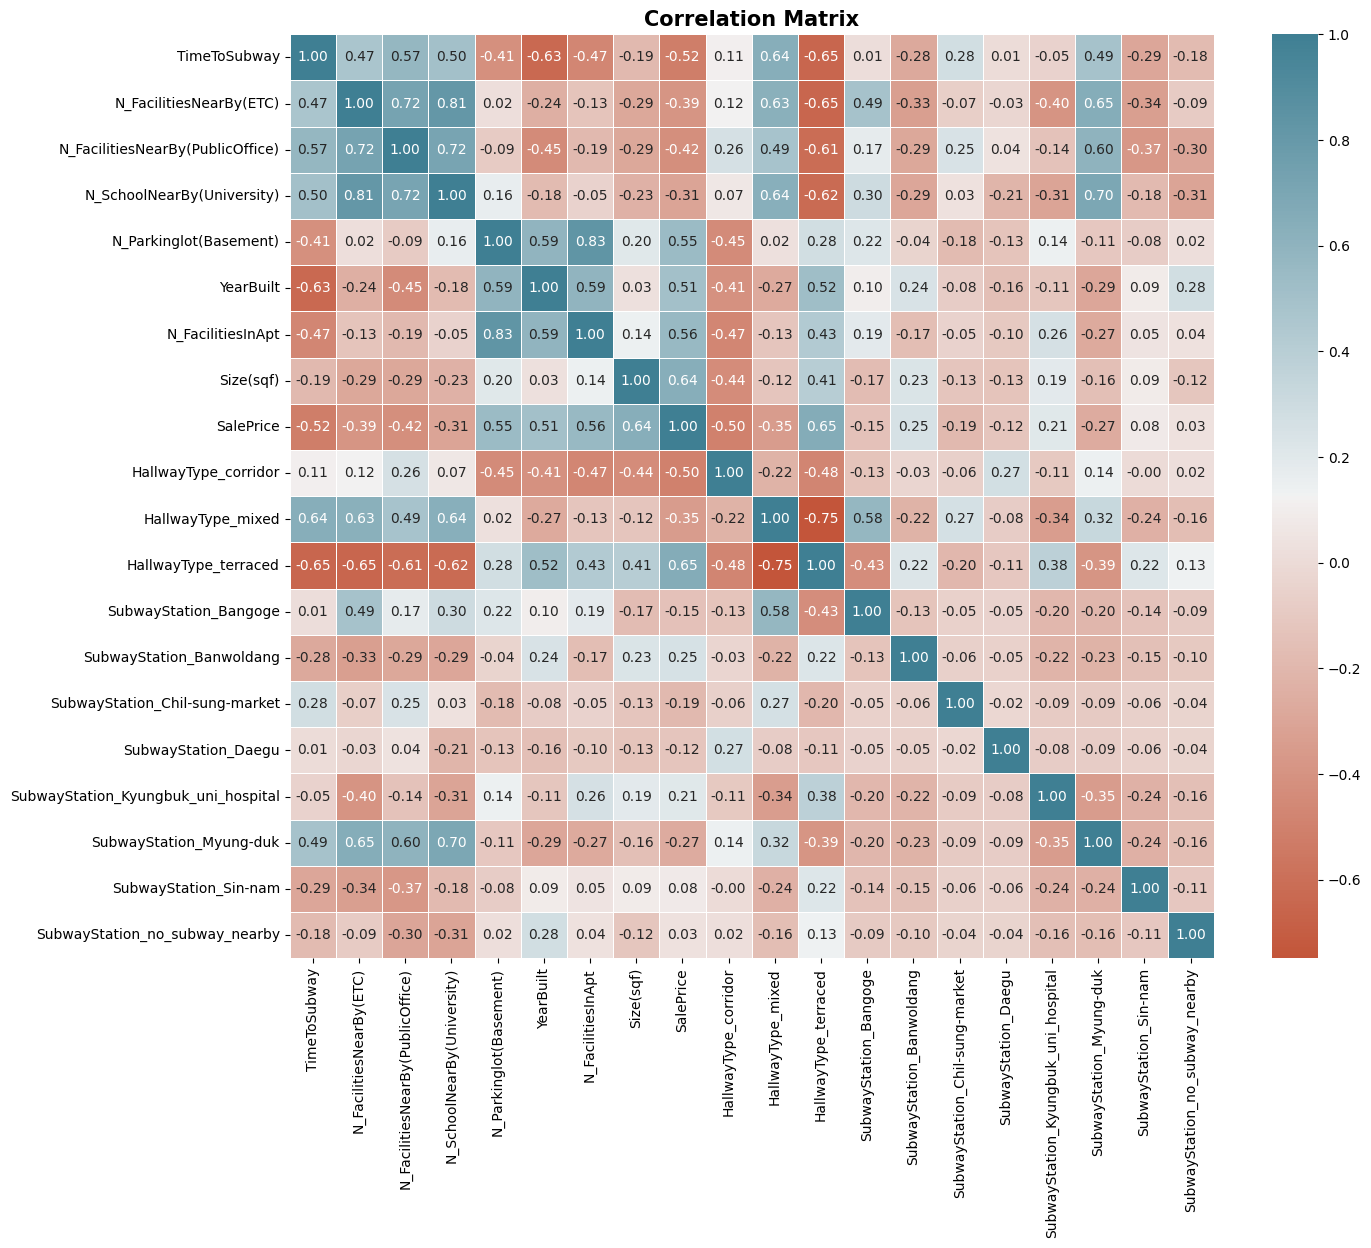

In [130]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

**Korelasi setiap feature terhadap Kolom SalePrice (Berdasarkan Correlation Matrix):**

In [131]:
df.corr().loc[['SalePrice']].round(2).T

,SalePrice
TimeToSubway,-0.52
N_FacilitiesNearBy(ETC),-0.39
N_FacilitiesNearBy(PublicOffice),-0.42
N_SchoolNearBy(University),-0.31
N_Parkinglot(Basement),0.55
YearBuilt,0.51
N_FacilitiesInApt,0.56
Size(sqf),0.64
SalePrice,1.00
HallwayType_corridor,-0.50


**Interpretasi Korelasi:**

1. Korelasi antara Target SalePrice dengan Feature SubwayStation:
    - Nilai korelasi (absolute) bervariasi antara 0.03-0.27
    - Berarti terdapat korelasi yang lemah antara SalePrice dan masing-masing SubwayStation. 

2. Korelasi antara Target SalePrice dengan Features lainnya:
    - Nilai korelasi (absolute) bervariasi antara 0.31-0.65 
    - Berarti terdapat korelasi yang sedang antara SalePrice dan masing-masing Features lainnya.

3. **Hasil korelasi ini perlu kita cek lagi melalui quick Evaluation Metrics (menggunakan Model Liner Regression) untuk mengetahui apakah kita perlu DROP feature SubwayStation atau tidak.**

## 5.2. Quick Evaluation Metrics

Untuk menentukan apakah kita perlu DROP feature SubwayStation atau tidak, maka kita akan Quick Evaluation Metrics terhadap 2 skenario, yaitu:
1. **Skenario 1 ==> Menggunakan semua features** (termasuk features SubwayStation).
2. **Skenario 2 ==> DROP features SubwayStation**. Menggunakan semua features yang tersisa (selain feature SubwayStation)

Quick Evaluation Metrics dilakukan menggunakan model **Multiple Linear Regression**

### 5.2.1. Skenario 1 ==> Menggunakan semua features

In [132]:
## Menampilkan dataset
df1 = df
df1.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,2.5,0.0,3.0,2.0,1270.0,2007,10,1387,346017,0,0,1,0,0,0,0,1,0,0,0
1,12.5,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1,0,0,0,0,1,0,0,0
2,17.5,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0,0,0,1,0,0,0,0,0
3,7.5,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0,1,0,0,0,0,0,0,0
4,2.5,0.0,1.0,2.0,536.0,2006,5,1743,311504,0,0,1,0,0,0,0,0,0,1,0


In [133]:
# Independent variable
X = df1.drop(columns= 'SalePrice')

# Dependent variable
y = df1['SalePrice']

# Splitting Dataset ==> dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

# Menggunakan Model Linear Regression
model1_LR = LinearRegression()
model1_LR.fit(X_train, y_train)

LinearRegression()

**Quick Evaluation Metrics**

In [134]:
## Data Training
r2_train1 = model1_LR.score(X_train, y_train)

## Data Testing
r2_test1 = model1_LR.score(X_test, y_test)

### 5.2.2. Skenario 2 ==> DROP features SubwayStation

In [135]:
# Menampilkan dataset (setelah DROP semua features SubwayStation)
df2 = df.drop(columns= ['SubwayStation_Bangoge', 'SubwayStation_Banwoldang', 'SubwayStation_Chil-sung-market', 'SubwayStation_Daegu', 'SubwayStation_Kyungbuk_uni_hospital', 'SubwayStation_Myung-duk', 'SubwayStation_Sin-nam', 'SubwayStation_no_subway_nearby'])
df2.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced
0,2.5,0.0,3.0,2.0,1270.0,2007,10,1387,346017,0,0,1
1,12.5,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1
2,17.5,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0
3,7.5,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0
4,2.5,0.0,1.0,2.0,536.0,2006,5,1743,311504,0,0,1


In [136]:
# Independent variable
X = df2.drop(columns= 'SalePrice')

# Dependent variable
y = df2['SalePrice']

# Splitting Dataset ==> dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

# Menggunakan Model Linear Regression
model2_LR = LinearRegression()
model2_LR.fit(X_train, y_train)

LinearRegression()

**Quick Evaluation Metrics**

In [137]:
## Data Training
r2_train2 = model2_LR.score(X_train, y_train)

## Data Testing
r2_test2 = model2_LR.score(X_test, y_test)

### 5.3.3. Perbandingan Hasil Quick Evaluation Metrics antara Skenario 1 dan Skenario 2

In [138]:
data_LR_quick = {
    "Skenario 1 Training" : [r2_train1],
    "Skenario 1 Testing" : [r2_test1],
    "Skenario 2 Training" : [r2_train2],
    "Skenario 2 Testing" : [r2_test2], 
}

pd.DataFrame(data_LR_quick, index=['R squared'])

,Skenario 1 Training,Skenario 1 Testing,Skenario 2 Training,Skenario 2 Testing
R squared,0.752143,0.727,0.741851,0.716693


**Kesimpulan:**

1. Untuk Skenario 1 ==> nilai R squared training dan testing tidak beda jauh (hanya berbeda 2.5 poin) ==> **Hasilnya Fit dan stabil**

2. Untuk Skenario 2 ==> nilai R squared metrics training dan testing tidak beda jauh (hanya berbeda 2.5 poin) ==> **Hasilnya Fit dan stabil**

3. Nilai R squared Skenario 1 lebih besar dari Skenario 2, meskipun tidak ada perbedaan yang signifikan (hanya berbeda 1.0 poin untuk Training dan Testing ) ==> **Performa Skenario 1 lebih baik dari Skenario 2.**

4. **Selanjutnya, kita gunakan dataset Skenario 1 untuk cek Intercept dan Koefisien masing-masing features.**

# 6. Analisa Intercept dan Koefisien

## 6.1. Cek Intercept dan Koefisien masing-masing features (menggunakan dataset Skenario 1)

In [139]:
# Independent variable
X = df1.drop(columns= 'SalePrice')

# Dependent variable
y = df1['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

# Model Linear Regression
model1_LR = LinearRegression()
model1_LR.fit(X_train, y_train)

LinearRegression()

**Intercept**

In [140]:
model1_LR.intercept_

np.float64(-4536058.666138314)

**Koefisien untuk setiap features**

In [141]:
pd.DataFrame(data = model1_LR.coef_, index = X_train.columns, columns= ['Coef'])

,Coef
TimeToSubway,1352.299820
N_FacilitiesNearBy(ETC),-5794.005440
N_FacilitiesNearBy(PublicOffice),2539.151369
N_SchoolNearBy(University),-5758.803988
N_Parkinglot(Basement),32.650739
YearBuilt,2270.871784
N_FacilitiesInApt,10990.056380
Size(sqf),131.768882
HallwayType_corridor,-1230.357216
HallwayType_mixed,-26241.071795


**Hasil cek koefisien:**

1. Feature N_Parkinglot(Basement) (koefisien = 32) dan Size(sqf) (koefisien = 131) memiliki nilai koefisien yang sangat kecil dibandingkan dengan features yang lain.

2. Untuk Feature Selection, kita bisa drop kolom yang koefisiennya sangat kecil yaitu N_Parkinglot(Basement) dan Size(sqf) ==> **Skenario 3 (DROP kolom N_Parkinglot(Basement) dan Size(sqf))**

3. Kemudian kita hitung performa Skenario 3 melalui Quick Evaluation Metrics.

## 6.2. Quick Evaluation Metrics - Skenario 3

**Menggunakan Skenario 3 ==> DROP features N_Parkinglot(Basement) dan Size(sqf)**

In [142]:
# Menampilkan dataset Skenario 3
df3 = df.drop(columns= ['N_Parkinglot(Basement)', 'Size(sqf)'])
df3.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),YearBuilt,N_FacilitiesInApt,SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
0,2.5,0.0,3.0,2.0,2007,10,346017,0,0,1,0,0,0,0,1,0,0,0
1,12.5,1.0,5.0,1.0,1986,4,150442,0,0,1,0,0,0,0,1,0,0,0
2,17.5,1.0,7.0,3.0,1997,5,61946,0,1,0,0,0,1,0,0,0,0,0
3,7.5,5.0,5.0,4.0,2005,7,165486,0,1,0,1,0,0,0,0,0,0,0
4,2.5,0.0,1.0,2.0,2006,5,311504,0,0,1,0,0,0,0,0,0,1,0


In [143]:
# Independent variable
X = df3.drop(columns= 'SalePrice')

# Dependent variable
y = df3['SalePrice']

# Splitting Dataset ==> dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

model3_LR = LinearRegression()
model3_LR.fit(X_train, y_train)

LinearRegression()

**Quick Evaluation Metrics**

In [144]:
## Data Training
r3_train3 = model3_LR.score(X_train, y_train)

## Data Testing
r3_test3 = model3_LR.score(X_test, y_test)

## 6.3. Perbandingan Hasil Quick Evaluation Metrics antara Skenario 1 dan Skenario 3

In [145]:
data_LR_quick = {
    "Skenario 1 Training" : [r2_train1],
    "Skenario 1 Testing" : [r2_test1],
    "Skenario 3 Training" : [r3_train3],
    "Skenario 3 Testing" : [r3_test3], 
}

pd.DataFrame(data_LR_quick, index=['R squared'])

,Skenario 1 Training,Skenario 1 Testing,Skenario 3 Training,Skenario 3 Testing
R squared,0.752143,0.727,0.599476,0.588722


**Kesimpulan:**
1. Untuk Skenario 3 ==> nilai R squared metrics training dan testing tidak beda jauh (hanya berbeda 2.5 poin) ==> **Hasilnya Fit dan stabil**

2. Namun, skenario 3 malah membuat nilai R squared turun signifikan (14-16 poin) ==> **Performa Skenario 1 jauh lebih baik dari Skenario 3.**

4. **Selanjutnya, kita tetap gunakan dataset Skenario 1 sebagai BASE MODEL.**

# 7. Scalling pada features

- Tujuan dari tahap scalling ini adalah mengecek apakah performa algoritma machine learning (yaitu Linear Regression dan KNN Regressor) akan menjadi lebih baik setelah dilakukan scalling pada features.

- Untuk scalling, kita akan membandingkan 2 tipe scalling yaitu:
    1. Standar Scaler
    2. Robust Scaler ==> Data outliers di bawah ini menunjukkan ada 5 features dengan masing-masing outliers > 3%. Robust scaler digunakan untuk mengatasi adanya data outliers tersebut.

**Cek Outliers**

In [146]:
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
    return df_outliers

data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            len(Cek_Outliers(df, col)),
            round(len(Cek_Outliers(df, col)) / len(df) * 100, 2)
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Outliers Val",
    "Outliers Percentage"
])

,Data Features,Data Types,Outliers Val,Outliers Percentage
0,TimeToSubway,float64,0,0.00
1,N_FacilitiesNearBy(ETC),float64,0,0.00
2,N_FacilitiesNearBy(PublicOffice),float64,0,0.00
3,N_SchoolNearBy(University),float64,0,0.00
4,N_Parkinglot(Basement),float64,0,0.00
5,YearBuilt,int64,0,0.00
6,N_FacilitiesInApt,int64,0,0.00
7,Size(sqf),int64,73,2.72
8,SalePrice,int64,4,0.15
9,HallwayType_corridor,int32,336,12.52


## 7.1. Scalling pada Algoritma Linear Regression

In [147]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

### 7.1.1. Scaling dengan StandardScaler()

In [148]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

model_LR_standard = LinearRegression()
model_LR_standard.fit(X_train_standard, y_train)

LinearRegression()

**Quick Evaluation Metrics**

In [149]:
## Data Training
LR_standard_r2_train = model_LR_standard.score(X_train_standard, y_train)

## Data Testing
LR_standard_r2_test = model_LR_standard.score(X_test_standard, y_test)

### 7.1.2. Scaling dengan RobustScaler()

In [150]:
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

model_LR_robust = LinearRegression()
model_LR_robust.fit(X_train_robust, y_train)

LinearRegression()

**Quick Evaluation Metrics**

In [151]:
## Data Training
LR_robust_r2_train = model_LR_robust.score(X_train_robust, y_train)

## Data Testing
LR_robust_r2_test = model_LR_robust.score(X_test_robust, y_test)

## 7.2. Scalling pada Algoritma KNN Regressor

### 7.2.1. Algoritma KNN tanpa Scaling

In [152]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

model_KNN = KNeighborsRegressor()
model_KNN.fit(X_train, y_train)

KNeighborsRegressor()

**Quick Evaluation Metrics**

In [153]:
## Data Training
KNN_r2_train = model_KNN.score(X_train, y_train)

## Data Testing
KNN_r2_test = model_KNN.score(X_test, y_test)

### 7.2.2. Scaling dengan StandardScaler()

In [154]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

model_KNN_standard = KNeighborsRegressor()
model_KNN_standard.fit(X_train_standard, y_train)

KNeighborsRegressor()

**Quick Evaluation Metrics**

In [155]:
## Data Training
KNN_standard_r2_train = model_KNN_standard.score(X_train_standard, y_train)

## Data Testing
KNN_standard_r2_test = model_KNN_standard.score(X_test_standard, y_test)

### 7.2.3. Scaling dengan RobustScaler()

In [156]:
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

model_KNN_robust = KNeighborsRegressor()
model_KNN_robust.fit(X_train_robust, y_train)

KNeighborsRegressor()

**Quick Evaluation Metrics**

In [157]:
## Data Training
KNN_robust_r2_train = model_KNN_robust.score(X_train_robust, y_train)

## Data Testing
KNN_robust_r2_test = model_KNN_robust.score(X_test_robust, y_test)

## 7.3. Perbandingan Hasil Quick Evaluatian Metrics

In [158]:
data_LR = {
    "LinReg tanpa Scaler" : [r2_train1, r2_test1, abs(r2_train1 - r2_test1)],
    "LinReg_StandardScaler" : [LR_standard_r2_train, LR_standard_r2_test, abs(LR_standard_r2_train - LR_standard_r2_test)],
    "LinReg_RobustScaler" : [LR_robust_r2_train, LR_robust_r2_test, abs(LR_robust_r2_train - LR_robust_r2_test)],
    "KNN tanpa Scaler" : [KNN_r2_train, KNN_r2_test, abs(KNN_r2_train - KNN_r2_test)],
    "KNN_StandardScaler" : [KNN_standard_r2_train, KNN_standard_r2_test, abs(KNN_standard_r2_train - KNN_standard_r2_test)],
    "KNN_RobustScaler" : [KNN_robust_r2_train, KNN_robust_r2_test, abs(KNN_robust_r2_train - KNN_robust_r2_test)]
}

pd.DataFrame(data_LR, index=['R squared Training', 'R squared Testing', 'Selisih']).T

,R squared Training,R squared Testing,Selisih
LinReg tanpa Scaler,0.752143,0.727000,0.025142
LinReg_StandardScaler,0.751466,0.726579,0.024888
LinReg_RobustScaler,0.751651,0.727097,0.024553
KNN tanpa Scaler,0.777598,0.757990,0.019608
KNN_StandardScaler,0.785079,0.762905,0.022174
KNN_RobustScaler,0.785167,0.762850,0.022317


**Kesimpulan:**

1. Untuk Algoritma Linear Regression:
    - Nilai R squared Training relatif sama.
    - Nilai R squared Testing relatif sama.
    - Hasil Training dan Testing tidak beda jauh, dengan selisih keduanya hanya sekitar 2 poin (< 5 poin) ==> Data Fit dan Stabil

2. Untuk Algoritma KNN Regression:
    - Nilai R squared Training relatif sama.
    - Nilai R squared Testing relatif sama.
    - Hasil Training dan Testing tidak beda jauh, dengan selisih keduanya hanya sekitar 2 poin (< 5 poin) ==> Data Fit dan Stabil

3. **Performa algoritma Linear Regression dan KNN Regressor TANPA Scalling dan DENGAN scalling relatif sama.**

4. **Selanjutnya, kita tetap menggunakan dataset tanpa Scalling pada features.**

# 8. Analisa Error

Tujuan dari Analisa Error adalah untuk mencari apakah ada karakteristik/kesamaan data yang menyebabkan error.

In [159]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

model1_LR = LinearRegression()
model1_LR.fit(X, y)

LinearRegression()

In [160]:
pred_train = model1_LR.predict(X_train)
pred_test = model1_LR.predict(X_test)

## 8.1. Data Training

In [161]:
## Menggabungkan X_train dan y_train
Train_set = pd.concat([X_train, y_train], axis=1)

## Menambah kolom harga prediksi
Train_set['Price_predict'] = pred_train

## Menghitung nilai Error yaitu selisih (absolute) antara harga aktual dan harga asli
Train_set['Error'] = abs(Train_set['SalePrice'] - Train_set['Price_predict'])

## Menampilkan data 20 Error tertinggi
Train_set.sort_values('Error', ascending=False).head(20)

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_corridor,HallwayType_mixed,...,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,SalePrice,Price_predict,Error
3502,2.5,5.0,7.0,5.0,1174.0,2014,9,1085,0,0,...,0,0,0,0,1,0,0,515044,330884.191989,184159.808011
3169,2.5,5.0,7.0,5.0,1174.0,1980,9,910,0,0,...,0,0,0,0,1,0,0,54867,234662.657520,179795.657520
2120,17.5,5.0,6.0,5.0,536.0,1993,4,2337,0,1,...,0,0,0,0,1,0,0,176991,339185.342199,162194.342199
4023,2.5,5.0,7.0,5.0,1174.0,1980,9,1060,0,0,...,0,0,0,0,1,0,0,92920,254440.198092,161520.198092
4041,2.5,5.0,7.0,5.0,1174.0,1980,9,910,0,0,...,0,0,0,0,1,0,0,76991,234662.657520,157671.657520
666,2.5,0.0,3.0,2.0,0.0,1978,3,1327,1,0,...,0,0,0,1,0,0,0,312389,155490.318643,156898.681357
2045,17.5,5.0,6.0,5.0,536.0,1993,4,2337,0,1,...,0,0,0,0,1,0,0,185840,339185.342199,153345.342199
1382,2.5,5.0,7.0,5.0,1174.0,1980,9,736,0,0,...,0,0,0,0,1,0,0,61946,211720.710457,149774.710457
493,17.5,5.0,6.0,5.0,536.0,1993,4,2337,0,1,...,0,0,0,0,1,0,0,190265,339185.342199,148920.342199
4027,17.5,5.0,6.0,5.0,536.0,1993,4,2337,0,1,...,0,0,0,0,1,0,0,193805,339185.342199,145380.342199


## 8.2. Data Testing

In [162]:
## Menggabungkan X_train dan y_train
Test_set = pd.concat([X_test, y_test], axis=1)

## Menambah kolom harga prediksi
Test_set['Price_predict'] = pred_test

## Menghitung nilai Error yaitu selisih (absolute) antara harga aktual dan harga asli
Test_set['Error'] = abs(Test_set['SalePrice'] - Test_set['Price_predict'])

## Menampilkan data 20 Error tertinggi
Test_set.sort_values('Error', ascending=False).head(20)

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_corridor,HallwayType_mixed,...,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,SalePrice,Price_predict,Error
530,2.5,0.0,5.0,3.0,930.0,2013,7,910,0,0,...,0,0,0,1,0,0,0,423008,275061.359779,147946.640221
2991,2.5,0.0,3.0,2.0,1270.0,2007,10,868,0,0,...,0,0,0,1,0,0,0,159292,299852.465663,140560.465663
1440,2.5,0.0,4.0,1.0,605.0,2007,5,1690,0,0,...,1,0,0,0,0,0,0,504424,369134.688987,135289.311013
2938,17.5,5.0,6.0,5.0,536.0,1993,4,2337,0,1,...,0,0,0,0,1,0,0,204424,339185.342199,134761.342199
251,2.5,0.0,3.0,2.0,0.0,1978,3,903,1,0,...,0,0,0,1,0,0,0,225663,99585.803960,126077.196040
1635,2.5,0.0,3.0,2.0,1270.0,2007,10,868,0,0,...,0,0,0,1,0,0,0,176991,299852.465663,122861.465663
3005,2.5,0.0,3.0,2.0,0.0,1978,3,903,1,0,...,0,0,0,1,0,0,0,221238,99585.803960,121652.196040
2089,12.5,1.0,2.0,2.0,184.0,2006,5,910,0,0,...,0,0,0,1,0,0,0,339823,218268.874803,121554.125197
880,2.5,0.0,3.0,2.0,0.0,1978,3,779,1,0,...,0,0,0,1,0,0,0,201769,83236.370421,118532.629579
2015,2.5,0.0,3.0,2.0,1270.0,2007,10,1643,0,0,...,0,0,0,1,0,0,0,517699,402036.425282,115662.574718


## 8.3. Hasil Analisa Error
1. Dari kedua data training dan data testing, error tinggi terjadi ketika feature TimeToSubway = 2.5
2. **Selanjutnya, kita drop data yang memiliki TimeToSubway = 2.5**

In [163]:
df = df[df['TimeToSubway'] != 2.5]
df.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
1,12.5,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1,0,0,0,0,1,0,0,0
2,17.5,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0,0,0,1,0,0,0,0,0
3,7.5,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0,1,0,0,0,0,0,0,0
5,17.5,1.0,7.0,3.0,56.0,1997,5,558,118584,0,1,0,0,0,1,0,0,0,0,0
7,7.5,5.0,5.0,4.0,798.0,2005,7,572,143362,0,1,0,1,0,0,0,0,0,0,0


# ====== Machine Learning Modelling ======

# 9. Cross Validation

Untuk Machine Learning modelling, kita memiliki 4 kandidat algoritma, yaitu:
1. Model Linear Regression
2. Model KNN Regressor
3. Model DecisionTree Regressor
4. Model RandomForest Regressor

Sebelum melakukan prediksi pada test dataset, **kita melakukan cross validation untuk menentukan benchmark model terbaik.**

In [164]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

In [165]:
LR = LinearRegression()
KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
Model = [LR, KNN, DT, RF]

In [166]:
## Cek scoring R squared
Mean_r2 = []
Std_r2 =[]

for i in Model:
    skf = KFold(n_splits=5)
    model = i
    model_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='r2')
    Mean_r2.append(model_cv.mean())
    Std_r2.append(model_cv.std())

In [167]:
## Cek scoring MSE
Mean_MSE = []
Std_MSE =[]

for i in Model:
    skf = KFold(n_splits=5)
    model = i
    model_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='neg_mean_absolute_error')
    Mean_MSE.append(model_cv.mean())
    Std_MSE.append(model_cv.std())

**Perbandingan hasil evaluasi dari 4 kandidat algoritma yang akan digunakan:**

In [168]:
pd.DataFrame({'Model' : ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor'],
              'Mean R squared' : Mean_r2,
              'StdDev R squared' : Std_r2,
              'Mean MAE' : Mean_MSE,
              'StdDev MAE' : Std_MSE})

,Model,Mean R squared,StdDev R squared,Mean MAE,StdDev MAE
0,Linear Regression,0.707120,0.042425,-35813.502860,1823.304802
1,KNN Regressor,0.702751,0.042213,-35874.001236,2066.389551
2,DecisionTree Regressor,0.724655,0.044245,-35133.551263,1822.661810
3,RandomForest Regressor,0.724763,0.043558,-35147.406014,1837.433361


**Kesimpulan:**

1. Dari sisi R squared:
    - Nilai R squared:
        - Nilai R squared DecisionTree dan RandomForest lebih tinggi dari Linear Regression dan KNN
        - Algoritma DecisionTree Regressor dan RandomForest Regressor lebih baik.
    - Standar Deviasi R squared:
        - Standar Deviasi R squared dari Linear Regression dan KNN lebih kecil dari DecisionTree dan RandomForest 
        - Data Algoritma Linear Regression dan KNN Regressor lebih stabil.

2. Dari sisi MAE:
    - Nilai MAE:
        - Nilai MAE DecisionTree dan RandomForest lebih kecil dari Linear Regression dan KNN
        - Algoritma DecisionTree Regressor dan RandomForest Regressor lebih baik.
    - Standar Deviasi MAE:
        - Standar Deviasi MAE dari Linear Regression dan DecisionTree lebih kecil dari KNN dan dan RandomForest  
        - Data Algoritma Linear Regression dan DecisionTree Regressor lebih stabil.

4. Dari ketiga fakta di atas, Algoritma Linear Regression, DecisionTree Regressor dan RandomForest Regressor lebih baik dari Algoritma KNN Regressor.

5. **Selanjutnya, kita gunakan 3 benchmark model terbaik yaitu Linear Regression, DecisionTree Regressor dan RandomForest Regressor untuk prediksi testing data**

# 10. Prediksi Test Dataset menggunakan Benchmark Model

In [169]:
df.head()

,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby
1,12.5,1.0,5.0,1.0,0.0,1986,4,914,150442,0,0,1,0,0,0,0,1,0,0,0
2,17.5,1.0,7.0,3.0,56.0,1997,5,558,61946,0,1,0,0,0,1,0,0,0,0,0
3,7.5,5.0,5.0,4.0,798.0,2005,7,914,165486,0,1,0,1,0,0,0,0,0,0,0
5,17.5,1.0,7.0,3.0,56.0,1997,5,558,118584,0,1,0,0,0,1,0,0,0,0,0
7,7.5,5.0,5.0,4.0,798.0,2005,7,572,143362,0,1,0,1,0,0,0,0,0,0,0


In [170]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

## 10.1. Linear Regression

In [171]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

*Evaluation Metrics Data Testing*

In [172]:
pred_test = model_LR.predict(X_test)

## R squared
LR_r2_test = r2_score(y_test, pred_test)

## MAE
LR_MAE_test = mean_absolute_error(y_test, pred_test)

## MSE
LR_MSE_test = mean_squared_error(y_test, pred_test)

## RMSE
LR_RMSE_test = np.sqrt(LR_MSE_test)

## 10.2. Decision Tree Regressor

In [173]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [174]:
# Evaluation Metrics Data Testing
pred_test = model_DT.predict(X_test)
DT_r2_test = r2_score(y_test, pred_test)
DT_MAE_test = mean_absolute_error(y_test, pred_test)
DT_MSE_test = mean_squared_error(y_test, pred_test)
DT_RMSE_test = np.sqrt(DT_MSE_test)

## 10.3. Random Forest Regressor

In [175]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)

RandomForestRegressor()

In [176]:
# Evaluation Metrics Data Testing
pred_test = model_RF.predict(X_test)
RF_r2_test = r2_score(y_test, pred_test)
RF_MAE_test = mean_absolute_error(y_test, pred_test)
RF_MSE_test = mean_squared_error(y_test, pred_test)
RF_RMSE_test = np.sqrt(RF_MSE_test)

## 10.4. Perbandingan Hasil Evaluation Metrics
**Antara Linear Regression, Polynomial Features, Decision Tree Regressor dan Random Forert Regressor**

In [177]:
data_DT_RF = {
    "Linear Regression Testing" : [LR_r2_test, LR_MAE_test, LR_MSE_test, LR_RMSE_test],
    "DecisionTree Regressor Testing" : [DT_r2_test, DT_MAE_test, DT_MSE_test, DT_RMSE_test],
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test]
}

pd.DataFrame(data_DT_RF, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
Linear Regression Testing,0.708429,33725.307736,1.765762e+09,42020.972220
DecisionTree Regressor Testing,0.727749,33033.414923,1.648758e+09,40604.904470
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061


**Hasil Perbandingan:**

1. Decision Tree Regressor dan Random Forest Regressor memiliki performa yang lebih baik dari Linear Regression ==> R squared lebih besar dan Error (MAE, MSE, RMSE) lebih kecil

2. **Selanjutnya, untuk prediksi testing data, kita abaikan Linear Regression, dan kita gunakan Algoritma DecisionTree Regressor dan RandomForest Regressor.**

# ====== Improvement Machine Learning ======


Pada tahap ini, kita akan **melakukan IMPROVEMENT dengan harapan dapat meningkatkan performa model**. Hasil improvement kita gunakan untuk prediksi test dataset. Berikut ini 2 langkah improvement yang akan dilakukan, yaitu:

1. Improvement Melalui Data:
    - Feature Engineering ==> Polynomial Features.

2. Improvement Melalui Model:
    - Regularization (Ridge, Lasso dan ElasticNet)
    - Manual Tuning (Ridge, Lasso dan ElasticNet)

Hasil improvement ini akan dibandingkan dengan kedua benchmark model (algoritma DecisionTree Regressor dan RandomForest Regressor)

# 11. Improvement Melalui Data

## 11.1. Features Engineering menggunakan POLYNOMIAL FEATURES

### 11.1.1. Manual Tuning ==> Mencari Nilai DEGREE TERBAIK

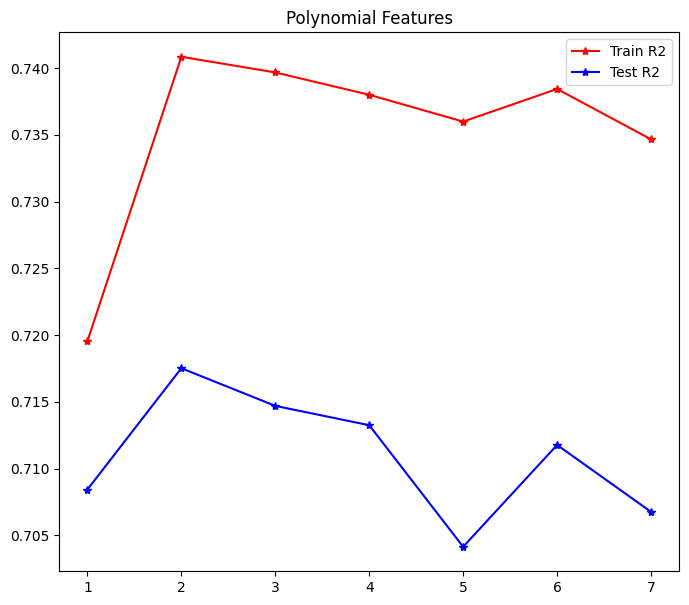

In [178]:
# # Independent variable
X = df.drop(columns='SalePrice')

# # Dependent variable
y = df['SalePrice']

degree = np.arange(1, 8, 1)
PF_r2_train = []
PF_r2_test = []

for i in degree:
    Poli = PolynomialFeatures(degree=i, include_bias=False, interaction_only = True)
    X_PF = Poli.fit_transform(X)
    X_train_PF, X_test_PF, y_train_PF, y_test_PF = train_test_split(X_PF, y, train_size = .80, random_state = 42)
    Model_PF = LinearRegression()
    Model_PF.fit(X_train_PF, y_train_PF)
    PF_r2_tr = Model_PF.score(X_train_PF, y_train_PF)
    PF_r2_ts = Model_PF.score(X_test_PF, y_test_PF)
    PF_r2_train.append(PF_r2_tr)
    PF_r2_test.append(PF_r2_ts)

plt.figure(figsize=(8,7))
plt.plot(degree, PF_r2_train, 'r*-')
plt.plot(degree, PF_r2_test, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title('Polynomial Features')
plt.show()

In [179]:
## DATA TRAINING
r2_max_PF_train = np.max(PF_r2_train) ## R squared maksimum
index_PF_train = np.argmax(PF_r2_train) ## Index untuk R squared maksimum
degree_PF_train = degree[index_PF_train] ## Degree terbaik

## DATA TESTING
r2_max_PF_test = np.max(PF_r2_test) ## R squared maksimum
index_PF_test = np.argmax(PF_r2_test) ## Index untuk R squared maksimum
degree_PF_test = degree[index_PF_test] ## Degree terbaik

data_r = {
    'Polynomial Features Training' : [r2_max_PF_train, degree_PF_train],
    'Polynomial Features Testing' : [r2_max_PF_test, degree_PF_test]     
}

pd.DataFrame(data_r, index = ['R squared Maksimum', 'Degree Terbaik']).T

,R squared Maksimum,Degree Terbaik
Polynomial Features Training,0.740856,2.0
Polynomial Features Testing,0.717519,2.0


**Selanjutnya, prediksi pada test dataset menggunakan degree terbaik**

### 11.1.2. Improvement menggunakan DEGREE TERBAIK

In [180]:
# Independent variable
X = df.drop(columns='SalePrice')

# Dependent variable
y = df['SalePrice']

# Polynomial Features
Poli = PolynomialFeatures(degree = degree_PF_test, include_bias=False, interaction_only = True)
X_PF = Poli.fit_transform(X)

# Spliting Data dengan proporsi 80:20 dan random_state = 42
X_train_PF, X_test_PF, y_train_PF, y_test_PF = train_test_split(X_PF, y, train_size = .80, random_state = 42)

Model_PF = LinearRegression()
Model_PF.fit(X_train_PF, y_train_PF)

LinearRegression()

In [181]:
# Evaluation Metrics Data Testing
PF_test = Model_PF.predict(X_test_PF)
PF_r2_ts = r2_score(y_test_PF, PF_test)
PF_MAE_ts = mean_absolute_error(y_test_PF, PF_test)
PF_MSE_ts = mean_squared_error(y_test_PF, PF_test)
PF_RMSE_ts = np.sqrt(PF_MSE_ts)

### 11.1.3. Perbandingan Evaluation Metrics
**Antara Linear Regression, Polynomial Features, Decision Tree Regressor dan Random Forert Regressor**

In [182]:
data_PF_DT_RF = {
    "Linear Regression Testing" : [LR_r2_test, LR_MAE_test, LR_MSE_test, LR_RMSE_test],
    "Polynomial Feature Testing" : [PF_r2_ts, PF_MAE_ts, PF_MSE_ts, PF_RMSE_ts],
    "DecisionTree Regressor Testing" : [DT_r2_test, DT_MAE_test, DT_MSE_test, DT_RMSE_test],
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test]
}

pd.DataFrame(data_PF_DT_RF, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
Linear Regression Testing,0.708429,33725.307736,1.765762e+09,42020.972220
Polynomial Feature Testing,0.717519,33437.015446,1.710713e+09,41360.762496
DecisionTree Regressor Testing,0.727749,33033.414923,1.648758e+09,40604.904470
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061


**Hasil Perbandingan:**

1. Hasil Polynomial Features:
    - Memiliki performa yang lebih baik dari linear Regression ==> R squared meningkat dan Error (MAE, MSE, RMSE) menurun.
    - Tapi performa Polynomial Features masih lebih rendah dari performa Decision Tree Regressor dan Random Forest.

2. **Selanjutnya, untuk prediksi testing data, kita abaikan Polynomial Features, dan kita gunakan Algoritma Decision Tree Regressor dan Random Forest.**

# 12. Improvement Melalui Model

## 12.1. Dengan REGULARIZATION + BASE MODEL (Data Skenario 1)

In [183]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spliting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

### 12.1.1. Ridge

In [184]:
Model_R = Ridge()
Model_R.fit(X_train, y_train)

Ridge()

In [185]:
# Evaluation Metrics Data Testing
R_test = Model_R.predict(X_test)
ridge_r2_test = r2_score(y_test, R_test)
ridge_MAE_test = mean_absolute_error(y_test, R_test)
ridge_MSE_test = mean_squared_error(y_test, R_test)
ridge_RMSE_test = np.sqrt(ridge_MSE_test)

### 12.1.2. Lasso

In [186]:
Model_L = Lasso()
Model_L.fit(X_train, y_train)

Lasso()

In [187]:
# Evaluation Metrics Data Testing
L_test = Model_L.predict(X_test)
lasso_r2_test = r2_score(y_test, L_test)
lasso_MAE_test = mean_absolute_error(y_test, L_test)
lasso_MSE_test = mean_squared_error(y_test, L_test)
lasso_RMSE_test = np.sqrt(lasso_MSE_test)

### 12.1.3. ElasticNet

In [188]:
Model_E = ElasticNet()
Model_E.fit(X_train, y_train)

ElasticNet()

In [189]:
# Evaluation Metrics Data Testing
E_test = Model_E.predict(X_test)
elastic_r2_test = r2_score(y_test, E_test)
elastic_MAE_test = mean_absolute_error(y_test, E_test)
elastic_MSE_test = mean_squared_error(y_test, E_test)
elastic_RMSE_test = np.sqrt(elastic_MSE_test)

### 12.1.4. Perbandingan Evaluation Metrics
**Antara Linear Regression, Polynomial Features, Decision Tree Regressor, Random Forert Regressor, Ridge, Lasso dan ElasticNet,**

In [190]:
data = {
    "Linear Regression Testing" : [LR_r2_test, LR_MAE_test, LR_MSE_test, LR_RMSE_test],
    "Polynomial Feature Testing" : [PF_r2_ts, PF_MAE_ts, PF_MSE_ts, PF_RMSE_ts],
    "DecisionTree Regressor Testing" : [DT_r2_test, DT_MAE_test, DT_MSE_test, DT_RMSE_test],
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test],
    "Ridge Testing" : [ridge_r2_test, ridge_MAE_test, ridge_MSE_test, ridge_RMSE_test],
    "Lasso Testing" : [lasso_r2_test, lasso_MAE_test, lasso_MSE_test, lasso_RMSE_test],
    "ElasticNet Testing" : [elastic_r2_test, elastic_MAE_test, elastic_MSE_test, elastic_RMSE_test]
}

pd.DataFrame(data, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
Linear Regression Testing,0.708429,33725.307736,1.765762e+09,42020.972220
Polynomial Feature Testing,0.717519,33437.015446,1.710713e+09,41360.762496
DecisionTree Regressor Testing,0.727749,33033.414923,1.648758e+09,40604.904470
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061
Ridge Testing,0.708668,33675.301437,1.764312e+09,42003.718416
Lasso Testing,0.708584,33707.035788,1.764825e+09,42009.820807
ElasticNet Testing,0.669909,36142.336613,1.999039e+09,44710.619057


**Hasil Perbandingan**

1. Hasil improvement melalui model dengan cara REGULARIZATION terhadap BASE MODEL (Data Skenario 1):
    - Untuk Ridge dan Lasso:
        - Memiliki performa yang lebih baik dari linear Regression ==> R squared meningkat dan Error (MAE, MSE, RMSE) menurun.
        - Tapi peningkatan performa ini masih lebih rendah dari performa Polynomial Features, Decision Tree Regressor dan Random Forert Regressor.
    - Untuk ElasticNet:
        - malah menurunkan performa linear Regression ==> R squared menurun dan Error (MAE, MSE, RMSE) meningkat.

2. **Selanjutnya, untuk prediksi testing data, kita abaikan improvement dengan REGULARIZATION terhadap BASE MODEL, dan kita gunakan Algoritma Decision Tree Regressor dan Random Forest.** 

## 12.2. Dengan Regularization + Polynomial Features (Dengan Degree Terbaik)

In [191]:
# Independent variable
X = df.drop(columns= 'SalePrice')

# Dependent variable
y = df['SalePrice']

# Spllting Data dengan proporsi 80:20 dan random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .80, random_state = 42)

### 12.2.1. Ridge + Polynomial Features

In [192]:
Model_PFR = Ridge()
Model_PFR.fit(X_train_PF, y_train_PF)

Ridge()

In [193]:
# Evaluation Metrics Data Testing
PFR_test = Model_PFR.predict(X_test_PF)
PF_ridge_r2_test = r2_score(y_test_PF, PFR_test)
PF_ridge_MAE_test = mean_absolute_error(y_test_PF, PFR_test)
PF_ridge_MSE_test = mean_squared_error(y_test_PF, PFR_test)
PF_ridge_RMSE_test = np.sqrt(PF_ridge_MSE_test)

### 12.2.2. Lasso + Polynomial Features

In [194]:
Model_PFL = Lasso()
Model_PFL.fit(X_train_PF, y_train_PF)

Lasso()

In [195]:
# Evaluation Metrics Data Testing
PFL_test = Model_PFL.predict(X_test_PF)
PF_lasso_r2_test = r2_score(y_test_PF, PFL_test)
PF_lasso_MAE_test = mean_absolute_error(y_test_PF, PFL_test)
PF_lasso_MSE_test = mean_squared_error(y_test_PF, PFL_test)
PF_lasso_RMSE_test = np.sqrt(PF_lasso_MSE_test)

### 12.2.3. ElasticNet + Polynomial Features

In [196]:
Model_PFE = ElasticNet()
Model_PFE.fit(X_train_PF, y_train_PF)

ElasticNet()

In [197]:
# Evaluation Metrics Data Testing
PFE_test = Model_PFE.predict(X_test_PF)
PF_elastic_r2_test = r2_score(y_test_PF, PFE_test)
PF_elastic_MAE_test = mean_absolute_error(y_test_PF, PFE_test)
PF_elastic_MSE_test = mean_squared_error(y_test_PF, PFE_test)
PF_elastic_RMSE_test = np.sqrt(PF_elastic_MSE_test)

### 12.2.4. Perbandingan Evaluation Metrics
**Antara Polynomial Features, Decision Tree Regressor, Random Forert Regressor, Ridge, Lasso, ElasticNet, Ridge+Polynomial Features, Lasso+Polynomial Features dan ElasticNet+Polynomial Features**

In [198]:
data = {
    "Polynomial Feature Testing" : [PF_r2_ts, PF_MAE_ts, PF_MSE_ts, PF_RMSE_ts],
    "DecisionTree Regressor Testing" : [DT_r2_test, DT_MAE_test, DT_MSE_test, DT_RMSE_test],
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test],
    "Ridge Testing" : [ridge_r2_test, ridge_MAE_test, ridge_MSE_test, ridge_RMSE_test],
    "Lasso Testing" : [lasso_r2_test, lasso_MAE_test, lasso_MSE_test, lasso_RMSE_test],
    "ElasticNet Testing" : [elastic_r2_test, elastic_MAE_test, elastic_MSE_test, elastic_RMSE_test],
    "Ridge + Polynomial Testing" : [PF_ridge_r2_test, PF_ridge_MAE_test, PF_ridge_MSE_test, PF_ridge_RMSE_test],
    "Lasso + Polynomial Testing" : [PF_lasso_r2_test, PF_lasso_MAE_test, PF_lasso_MSE_test, PF_lasso_RMSE_test],
    "ElasticNet + Polynomial Testing" : [PF_elastic_r2_test, PF_elastic_MAE_test, PF_elastic_MSE_test, PF_elastic_RMSE_test]
}

pd.DataFrame(data, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
Polynomial Feature Testing,0.717519,33437.015446,1.710713e+09,41360.762496
DecisionTree Regressor Testing,0.727749,33033.414923,1.648758e+09,40604.904470
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061
Ridge Testing,0.708668,33675.301437,1.764312e+09,42003.718416
Lasso Testing,0.708584,33707.035788,1.764825e+09,42009.820807
ElasticNet Testing,0.669909,36142.336613,1.999039e+09,44710.619057
Ridge + Polynomial Testing,0.717521,33436.886117,1.710702e+09,41360.630132
Lasso + Polynomial Testing,0.717621,33417.527951,1.710095e+09,41353.291458
ElasticNet + Polynomial Testing,0.718077,33376.684911,1.707334e+09,41319.900349


**Hasil Perbandingan:**

1. Hasil improvement melalui model dengan cara REGULARIZATION dan POLYNOMIAL FEATURES:
    - Memiliki performa yang relatif sama dengan Polynomial Features.
    - Memiliki performa yang lebih baik dari REGULARIZATION pada BASE MODEL ==> R squared meningkat dan Error (MAE, MSE, RMSE) menurun.
    - Tapi peningkatan performa ini masih lebih rendah dari performa Decision Tree Regressor dan Random Forert Regressor.

2. **Selanjutnya, untuk prediksi testing data, kita abaikan improvement dengan REGULARIZATION + POLYNOMIAL FEATURES, dan kita gunakan Algoritma Decision Tree Regressor dan Random Forest.** 

## 12.3. Tuning Regularization + Polynomial Features (dengan menggunakan Alpha terbaik)

- Menggunakan Regularization (Ridge, Lasso dan ElasticNet) dengan berbagai nilai alpha (yaitu 100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001)
- Evaluation Metrics ==> Mencari nilai Alpha terbaik yang memberikan nilai R squared maksimum

In [199]:
## List nilai Alpha yang akan diuji coba hasilnya
param_a = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]

### 12.3.1. Manual Tuning Ridge

**Mencari nilai Alpha terbaik (dari param_a) yang memberikan nilai R squared maksimum**

In [200]:
train_r = [] ## Training List Result
test_r = [] ## Testing List Result

for i in param_a: ## Melooping nilai dari param_a
    model_R = Ridge(alpha=i) ## Define model dengan nilai Alpha sesuai dengan nilai i (looping)
    model_R.fit(X_train_PF, y_train_PF) ## Training model dengan data polynomial
    y_pred_tr = model_R.predict(X_train_PF) ## Model predict data Training
    r2_train = r2_score(y_train_PF, y_pred_tr) ## Kalkulasi Evaluation Metrics (R squared) dari data training
    y_pred_ts = model_R.predict(X_test_PF) ## Model predict data Testing
    r2_test = r2_score(y_test_PF, y_pred_ts) ## Kalkulasi Evaluation Metrics (R squared) dari data Testing
    train_r.append(r2_train) ## Memasukkan hasil evaluation metrics ke dalam training list
    test_r.append(r2_test) ## Memasukkan hasil evaluation metrics ke dalam testing list

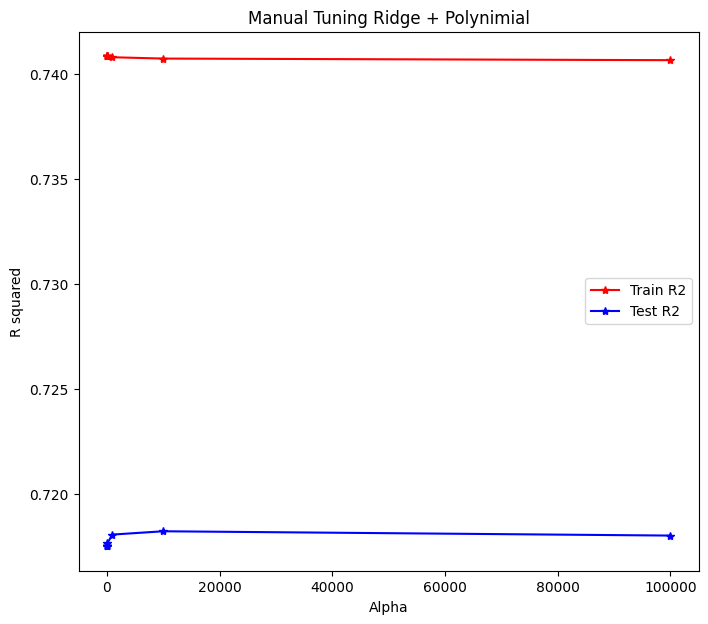

In [201]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title('Manual Tuning Ridge + Polynimial')
plt.xlabel('Alpha')
plt.ylabel('R squared')
plt.show()

In [202]:
## DATA TRAINING
r2_max_r_train = np.max(train_r) ## R squared maksimum
index_r_train = np.argmax(train_r) ## Index untuk R squared maksimum
alpha_r_train = param_a[index_r_train] ## Alpha terbaik

## DATA TESTING
r2_max_r_test = np.max(test_r) ## R squared maksimum
index_r_test = np.argmax(train_r) ## Index untuk R squared maksimum
alpha_r_test = param_a[index_r_test] ## Alpha terbaik

data_r = {
    'Tuning Ridge + Polynomial Training' : [r2_max_r_train, alpha_r_train],
    'Tuning Ridge + Polynomial Testing' : [r2_max_r_test, alpha_r_test]     
}

pd.DataFrame(data_r, index = ['R squared Maksimum', 'Alpha Terbaik']).T

,R squared Maksimum,Alpha Terbaik
Tuning Ridge + Polynomial Training,0.740856,0.001
Tuning Ridge + Polynomial Testing,0.718231,0.001


**Evaluation Metrics dengan Alpha Terbaik**

In [203]:
## Data Testing
model_TR = Ridge(alpha = alpha_r_test)
model_TR.fit(X_train_PF, y_train_PF)
y_pred_ts = model_TR.predict(X_test_PF)

TR_r2_test = r2_score(y_test_PF, y_pred_ts) 
TR_MAE_test = mean_absolute_error(y_test_PF, y_pred_ts)
TR_MSE_test = mean_squared_error(y_test_PF, y_pred_ts)
TR_RMSE_test = np.sqrt(TR_MSE_test)

### 12.3.2. Manual Tuning Lasso

**Mencari nilai Alpha terbaik (dari param_a) yang memberikan nilai R squared maksimum**

In [204]:
train_l = [] ## Training List Result
test_l = [] ## Testing List Result

for i in param_a: ## Melooping nilai dari param_a
    model_R = Lasso(alpha=i) ## Define model dengan nilai Alpha sesuai dengan nilai i (looping)
    model_R.fit(X_train_PF, y_train_PF) ## Training model dengan data polynomial
    y_pred_tr = model_R.predict(X_train_PF) ## Model predict data Training
    r2_train = r2_score(y_train_PF, y_pred_tr) ## Kalkulasi Evaluation Metrics (R squared) dari data training
    y_pred_ts = model_R.predict(X_test_PF) ## Model predict data Testing
    r2_test = r2_score(y_test_PF, y_pred_ts) ## Kalkulasi Evaluation Metrics (R squared) dari data Testing
    train_l.append(r2_train) ## Memasukkan hasil evaluation metrics ke dalam training list
    test_l.append(r2_test) ## Memasukkan hasil evaluation metrics ke dalam testing list

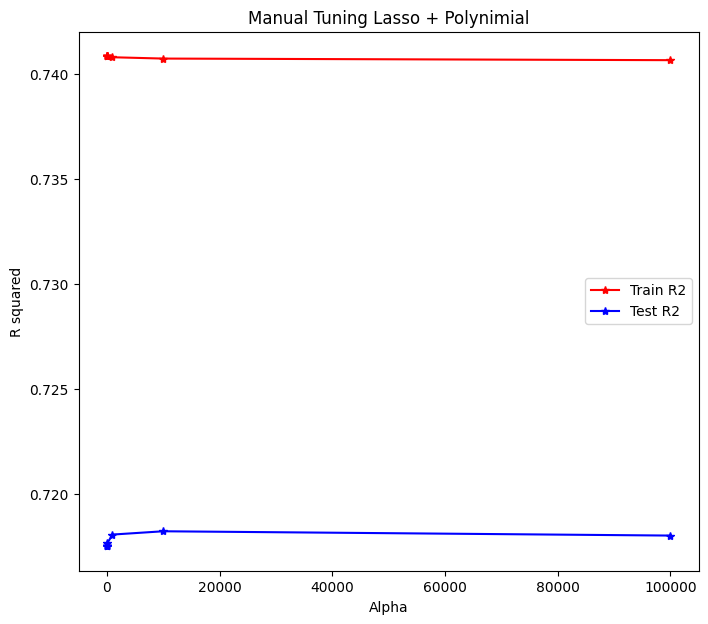

In [205]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title('Manual Tuning Lasso + Polynimial')
plt.xlabel('Alpha')
plt.ylabel('R squared')
plt.show()

In [206]:
## DATA TRAINING
r2_max_l_train = np.max(train_l) ## R squared maksimum
index_l_train = np.argmax(train_l) ## Index untuk R squared maksimum
alpha_l_train = param_a[index_l_train] ## Alpha terbaik

## DATA TESTING
r2_max_l_test = np.max(test_l) ## R squared maksimum
index_l_test = np.argmax(train_l) ## Index untuk R squared maksimum
alpha_l_test = param_a[index_l_test] ## Alpha terbaik

data_l = {
    'Tuning Lasso + Polynomial Training' : [r2_max_l_train, alpha_l_train],
    'Tuning Lasso + Polynomial Testing' : [r2_max_l_test, alpha_l_test]     
}

pd.DataFrame(data_l, index = ['R squared Maksimum', 'Alpha Terbaik']).T

,R squared Maksimum,Alpha Terbaik
Tuning Lasso + Polynomial Training,0.740652,0.001
Tuning Lasso + Polynomial Testing,0.718674,0.001


*Evaluation Metrics dengan Alpha Terbaik*

In [207]:
## Data Testing
model_TL = Lasso(alpha = alpha_l_test)
model_TL.fit(X_train_PF, y_train_PF)
y_pred_ts = model_TL.predict(X_test_PF)

TL_r2_test = r2_score(y_test_PF, y_pred_ts) 
TL_MAE_test = mean_absolute_error(y_test_PF, y_pred_ts)
TL_MSE_test = mean_squared_error(y_test_PF, y_pred_ts)
TL_RMSE_test = np.sqrt(TL_MSE_test)

### 12.3.3. Manual Tuning ElasticNet

**Mencari nilai Alpha terbaik (dari param_a) yang memberikan nilai R squared maksimum**

In [208]:
train_e = [] ## Training List Result
test_e = [] ## Testing List Result

for i in param_a: ## Melooping nilai dari param_a
    model_R = ElasticNet(alpha=i) ## Define model dengan nilai Alpha sesuai dengan nilai i (looping)
    model_R.fit(X_train_PF, y_train_PF) ## Training model dengan data polynomial
    y_pred_tr = model_R.predict(X_train_PF) ## Model predict data Training
    r2_train = r2_score(y_train_PF, y_pred_tr) ## Kalkulasi Evaluation Metrics (R squared) dari data training
    y_pred_ts = model_R.predict(X_test_PF) ## Model predict data Testing
    r2_test = r2_score(y_test_PF, y_pred_ts) ## Kalkulasi Evaluation Metrics (R squared) dari data Testing
    train_e.append(r2_train) ## Memasukkan hasil evaluation metrics ke dalam training list
    test_e.append(r2_test) ## Memasukkan hasil evaluation metrics ke dalam testing list

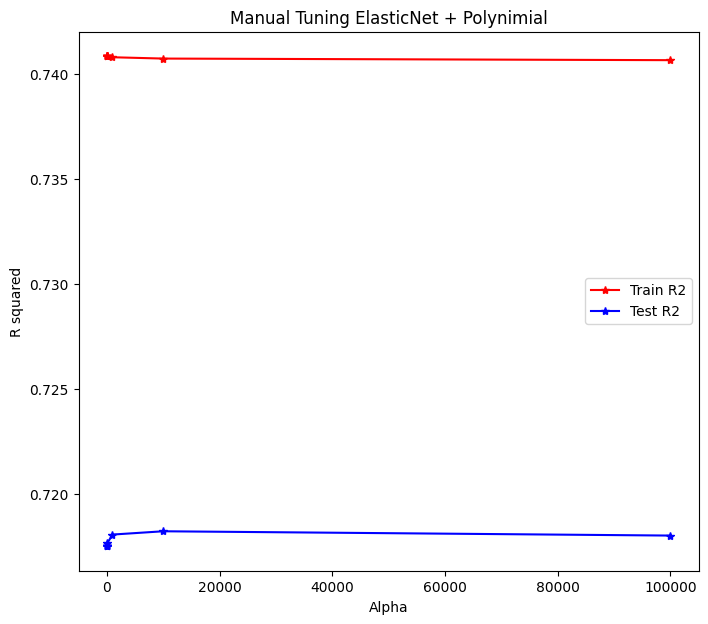

In [209]:
plt.figure(figsize=(8,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title('Manual Tuning ElasticNet + Polynimial')
plt.xlabel('Alpha')
plt.ylabel('R squared')
plt.show()

In [210]:
## DATA TRAINING
r2_max_e_train = np.max(train_e) ## R squared maksimum
index_e_train = np.argmax(train_e) ## Index untuk R squared maksimum
alpha_e_train = param_a[index_e_train] ## Alpha terbaik

## DATA TESTING
r2_max_e_test = np.max(test_e) ## R squared maksimum
index_e_test = np.argmax(train_e) ## Index untuk R squared maksimum
alpha_e_test = param_a[index_e_test] ## Alpha terbaik

data_e = {
    'Tuning ElasticNet + Polynomial Training' : [r2_max_e_train, alpha_e_train],
    'Tuning ElasticNet + Polynomial Testing' : [r2_max_e_test, alpha_e_test]     
}

pd.DataFrame(data_e, index = ['R squared Maksimum', 'Alpha Terbaik']).T

,R squared Maksimum,Alpha Terbaik
Tuning ElasticNet + Polynomial Training,0.740653,0.01
Tuning ElasticNet + Polynomial Testing,0.718261,0.01


**Evaluation Metrics dengan Alpha Terbaik**

In [211]:
## Data Testing
model_TE = ElasticNet(alpha = alpha_e_test)
model_TE.fit(X_train_PF, y_train_PF)
y_pred_ts = model_TE.predict(X_test_PF)

TE_r2_test = r2_score(y_test_PF, y_pred_ts) 
TE_MAE_test = mean_absolute_error(y_test_PF, y_pred_ts)
TE_MSE_test = mean_squared_error(y_test_PF, y_pred_ts)
TE_RMSE_test = np.sqrt(TE_MSE_test)

### 12.3.4. Perbandingan Evaluation Metrics

In [212]:
data = {
    "DecisionTree Regressor Testing" : [DT_r2_test, DT_MAE_test, DT_MSE_test, DT_RMSE_test],
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test],
    "Tuning Ridge + Polynomial Testing" : [TR_r2_test, TR_MAE_test, TR_MSE_test, TR_RMSE_test],
    "Tuning Lasso + Polynomial Testing" : [TL_r2_test, TL_MAE_test, TL_MSE_test, TL_RMSE_test],
    "Tuning ElasticNet + Polynomial Testing" : [TE_r2_test, TE_MAE_test, TE_MSE_test, TE_RMSE_test]
}

pd.DataFrame(data, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
DecisionTree Regressor Testing,0.727749,33033.414923,1.648758e+09,40604.904470
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061
Tuning Ridge + Polynomial Testing,0.717519,33437.015315,1.710713e+09,41360.762361
Tuning Lasso + Polynomial Testing,0.717642,33416.384901,1.709967e+09,41351.743723
Tuning ElasticNet + Polynomial Testing,0.717643,33415.945852,1.709963e+09,41351.697460


**Hasil Perbandingan:**

1. Performa Decision Tree Regressor dan Random Forert Regressor masih lebih baik dari hasil improvement dengan cara Tuning Regularization + Polynomial Features (dengan menggunakan Alpha terbaik)

2. Performa Random Forert Regressor sedikit lebih baik dari performa Decision Tree Regressor.

3. **Selanjutnya, untuk conclusion, kita gunakan Algoritma Random Forest Regressor sebagai algoritma terbaik di Capstone Project ini.** 

In [213]:
data = {
    "RandomForest Regressor Testing" : [RF_r2_test, RF_MAE_test, RF_MSE_test, RF_RMSE_test],

}

pd.DataFrame(data, index=['R squared', 'MAE', 'MSE', 'RMSE']).T

,R squared,MAE,MSE,RMSE
RandomForest Regressor Testing,0.728197,33023.012444,1.646043e+09,40571.460061


In [214]:
# Persentase Error terhadap Rata-rata harga apartement
RF_MAE_test / df['SalePrice'].mean()

np.float64(0.19177310651899035)

In [215]:
# maksimum harga apartement
df['SalePrice'].mean()

np.float64(172198.34962147282)

# 13. Conclusion dan Reccomendation

## 13.1. Conclusion

1. Metrik evaluasi yang digunakan pada model adalah nilai R squared, MAE, MSE dan RMSE.

2. Jika ditinjau dari nilai akhir MAE yang dihasilkan oleh algoritma RandomForest Regressor tuning, yaitu sebesar 19%.

3. Jika model yang kita buat ini digunakan untuk memperkirakan harga apartemen baru di Korea Selatan pada rentang nilai seperti yang dilatih terhadap model (maksimal harga Won 172,198), maka **perkiraan harganya rata-rata akan meleset kurang lebih sebesar 19% dari harga seharusnya.**
 
4. Tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena banyaknya data yang di DROP sebagai berikut:
    - Jumlah data awal = 4123
    - Jumlah data duplikat yang di DROP = 1422
    - Jumah data outliers yang di DROP = 17
    - Jumlah data feature 'TimeToSubway' == 2.5 (yang menyebabkan error tinggi) = 1231
    - Jumlah data akhir yang digunakan untuk Machine Learning Modelling = 1453 (hanya 35% dari data awal).

## 13.2. Recommendation

1. **Data ini masih bisa dikembangkan dengan 4 alternatif cara**, yaitu:
    - melakukan hyperparameter tuning pada algoritma DecisionTree Regressor (seperti maximum depth, minimum samples split dan minimum samples leaf) begitu juga RandomForest Regressor.
    - memperbanyak data baru yang bukan duplikat sehingga dapat menghasilkan prediksi yang lebih baik lagi.
    - Jika ada penambahan banyak data, bisa coba menggunakan model yang lebih kompleks, seperti Recursive Neural Networks (RNN). 
    - melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah sewa listing. 
    - Melalui 4 alternatif di atas, diharapkan kita bisa dapat insight lain (contoh: apa yang bisa dan harus diperbaiki pada model). 

2. Jika memungkinkan, **penambahan fitur yang lebih korelatif dengan target ('price') untuk menekan error dan meningkatkan akurasi prediksi dari model kita**, seperti:
    - Jarak ke pusat kota dan pusat belanja.
    - Karakteristik apartemen, seperti jumlah kamar, jumlah kamar mandi, lantai berapa dan view sekitar dari unit.
    - Rate per meter square (seperti IPL di Indonesia)
    - data review penyewa apartemen

3. **Hasil Machine Learning Modelling ini bisa dikombinasi dengan data dari provider lain** seperti AirBnB, Developer Apartemen, dan Pemerintah setempat, yaitu:
    - Bagi AirBnB: bisa menjadi data pembanding,
    - Bagi Developer Apartemen: bisa menjadi data referensi dalam marketing (seperti penentuan diskon, promo, dan jenis kerjasama kredit dengan Bank, dll)
    - Bagi pemerintah setempat: bisa digunakan untuk analisa inflasi di sektor properti.

# Save Model

Sejujurnya saya kurang memahami cara save model menggunakan pickle. Saya coba sebisa saya untuk save model. Seandainya proses saving ini mempengaruhi pemodelan, saya mohon kebijaksanaan Purwadhika. Terimakasih

In [216]:
import pickle
import pickle as pk

In [217]:
# Saving model to pickle file
with open("edward_randomforest.pkl", "wb") as file:
    pickle.dump(model, file)

In [218]:
print("Model saved successfully.")

Model saved successfully.


In [219]:
# Opening saved model
with open("edward_randomforest.pkl", "rb") as file:
    model = pickle.load(file)

In [220]:
print("Model loaded successfully.")

Model loaded successfully.
